<a href="https://colab.research.google.com/github/DanechkaSmirnov/lagrange_interpolation/blob/main/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Номер в группе: 11
from math import sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return cos(x)/sin(x)+x*x

def get_nonopt_points(n, a, b):
    points = []
    for i in range(0, n):
        point = a+(b-a)/n*i
        points.append(point)
    answ = [[x, f(x)] for x in points]
    return answ

def get_opt_points(n, a, b):
    points = []
    for i in range(0, n):
        point = 1/2*((b-a)*cos((2*i+1)/(2*n+2)*pi)+(b+a))
        points.append(point)
    answ = [[x, f(x)] for x in points]
    return answ[::-1]

def basis(points, k, x):
    coef = 1
    prod = 1
    for i in range(len(points)):
        if i != k:
            coef *= points[k][0]-points[i][0]
            prod *= x - points[i][0]
    return prod/coef

def lagrange(n, a, b, x, optimal = False):
    if not optimal:
        points = get_nonopt_points(n, a, b)
    else:
        points = get_opt_points(n, a, b)
    point = 0
    for i in range(n):
        point+= points[i][1]*basis(points, i, x)
    return point

def max_error(n, a, b):
    points = np.linspace(a, b, n*100)[:-10]
    maximum = 0
    point = 0
    maximum_opt = 0
    point_opt = 0
    for x in points:
        err = abs(f(x) - lagrange(n, a, b, x))
        if err > maximum:
            maximum = err
            point = x
        err_opt = abs(f(x) - lagrange(n, a, b, x, True))
        if err_opt > maximum_opt:
            maximum_opt = err_opt
            point_opt = x
    return f'n = {n}, m = {n*100}, RN_n = {round(maximum, 8)}, RNopt_n = {round(maximum_opt, 8)}'
    
    

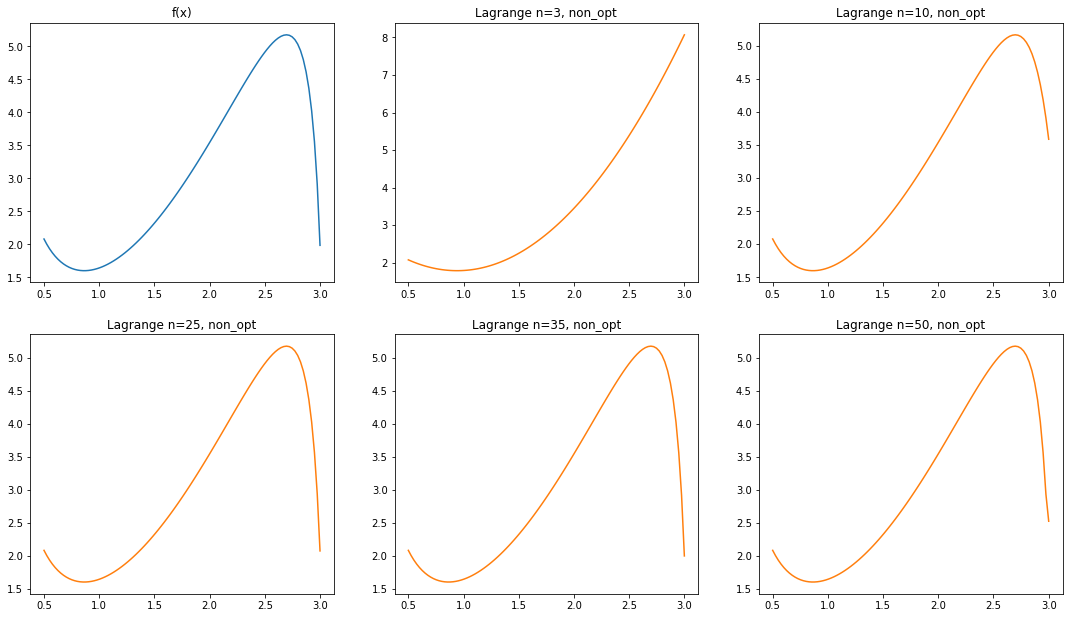

In [ ]:
a = 0.5
b = 3


    
x = np.linspace(a, b, 100)
y = np.array([f(y) for y in x])
y_3 = np.array([lagrange(3, a, b, x) for x in x])
y_10 = np.array([lagrange(10, a, b, x) for x in x])
y_25 = np.array([lagrange(25, a, b, x) for x in x])
y_35 = np.array([lagrange(35, a, b, x) for x in x])
y_50 = np.array([lagrange(50, a, b, x) for x in x])


fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('f(x)')
axs[0, 1].plot(x, y_3, 'tab:orange')
axs[0, 1].set_title('Lagrange n=3, non_opt')
axs[0, 2].plot(x, y_10, 'tab:orange')
axs[0, 2].set_title('Lagrange n=10, non_opt')
axs[1, 0].plot(x, y_25, 'tab:orange')
axs[1, 0].set_title('Lagrange n=25, non_opt')
axs[1, 1].plot(x, y_35, 'tab:orange')
axs[1, 1].set_title('Lagrange n=35, non_opt')
axs[1, 2].plot(x, y_50, 'tab:orange')
axs[1, 2].set_title('Lagrange n=50, non_opt')
fig.set_size_inches(18.5, 10.5, forward=True)



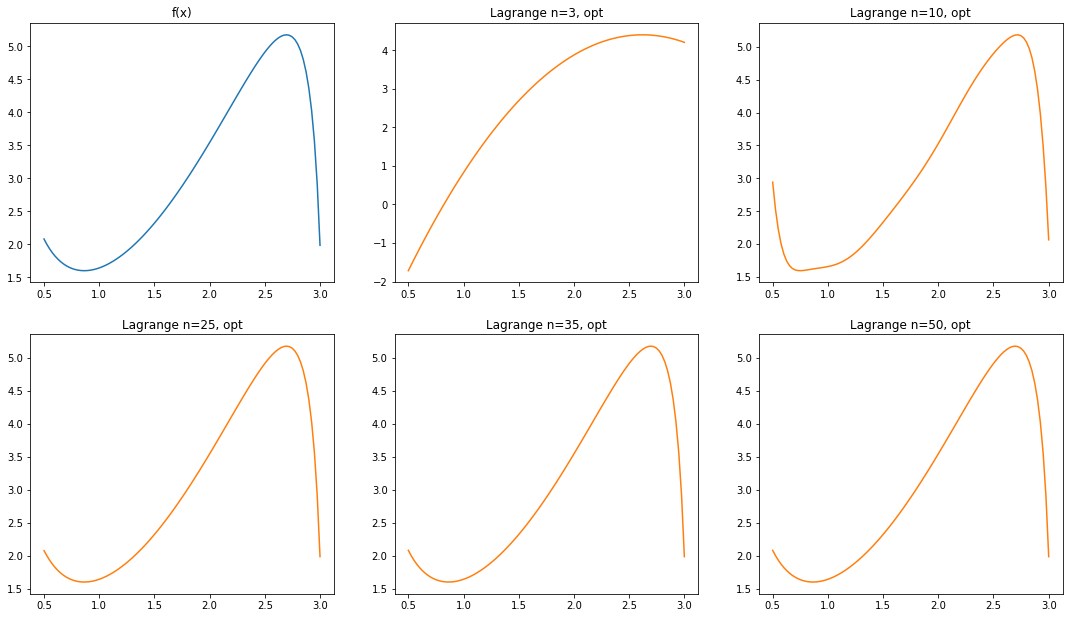

In [ ]:
a = 0.5
b = 3


    
x = np.linspace(a, b, 100)
y = np.array([f(y) for y in x])
y_3 = np.array([lagrange(3, a, b, x, True) for x in x])
y_10 = np.array([lagrange(10, a, b, x, True) for x in x])
y_25 = np.array([lagrange(25, a, b, x, True) for x in x])
y_35 = np.array([lagrange(35, a, b, x, True) for x in x])
y_50 = np.array([lagrange(50, a, b, x, True) for x in x])


fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('f(x)')
axs[0, 1].plot(x, y_3, 'tab:orange')
axs[0, 1].set_title('Lagrange n=3, opt')
axs[0, 2].plot(x, y_10, 'tab:orange')
axs[0, 2].set_title('Lagrange n=10, opt')
axs[1, 0].plot(x, y_25, 'tab:orange')
axs[1, 0].set_title('Lagrange n=25, opt')
axs[1, 1].plot(x, y_35, 'tab:orange')
axs[1, 1].set_title('Lagrange n=35, opt')
axs[1, 2].plot(x, y_50, 'tab:orange')
axs[1, 2].set_title('Lagrange n=50, opt')
fig.set_size_inches(18.5, 10.5, forward=True)


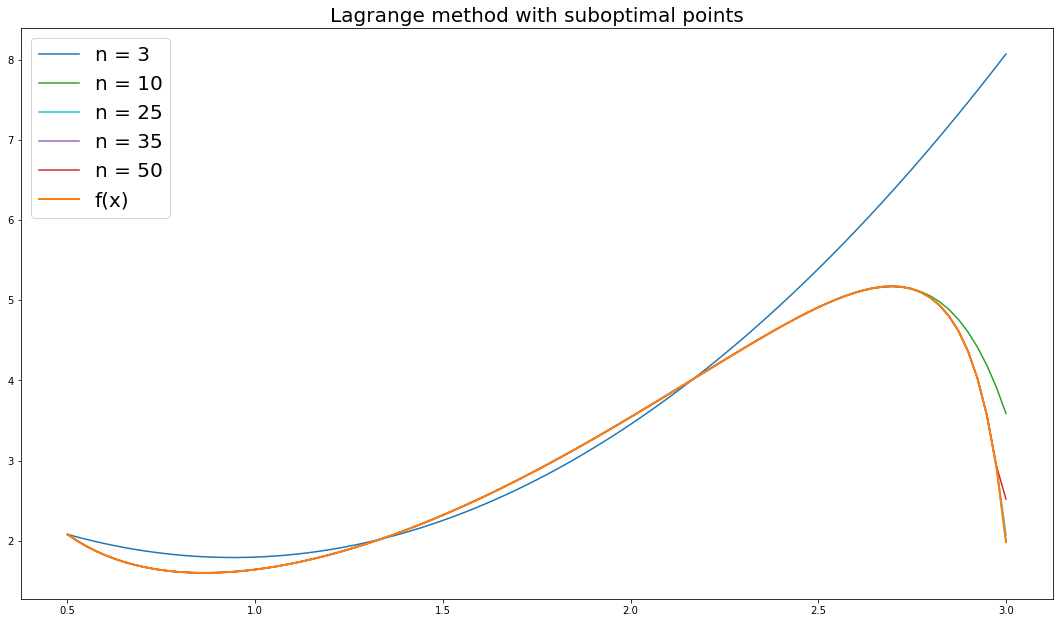

In [ ]:
a = 0.5
b = 3


    
x = np.linspace(a, b, 100)
y = np.array([f(y) for y in x])
y_3 = np.array([lagrange(3, a, b, x) for x in x])
y_10 = np.array([lagrange(10, a, b, x) for x in x])
y_25 = np.array([lagrange(25, a, b, x) for x in x])
y_35 = np.array([lagrange(35, a, b, x) for x in x])
y_50 = np.array([lagrange(50, a, b, x) for x in x])


fig, ax = plt.subplots()
ax.set_title('Lagrange method with suboptimal points', fontsize = 20)
ax.plot(x, y_3, 'tab:blue', label = 'n = 3')
ax.plot(x, y_10, 'tab:green', label = 'n = 10')
ax.plot(x, y_25, 'tab:cyan', label = 'n = 25')
ax.plot(x, y_35, 'tab:purple', label = 'n = 35')
ax.plot(x, y_50, 'tab:red', label = 'n = 50')
ax.plot(x, y, 'tab:orange', label = 'f(x)', linewidth = 2)
ax.legend(prop = {'size': 20})
fig.set_size_inches(18.5, 10.5, forward=True)

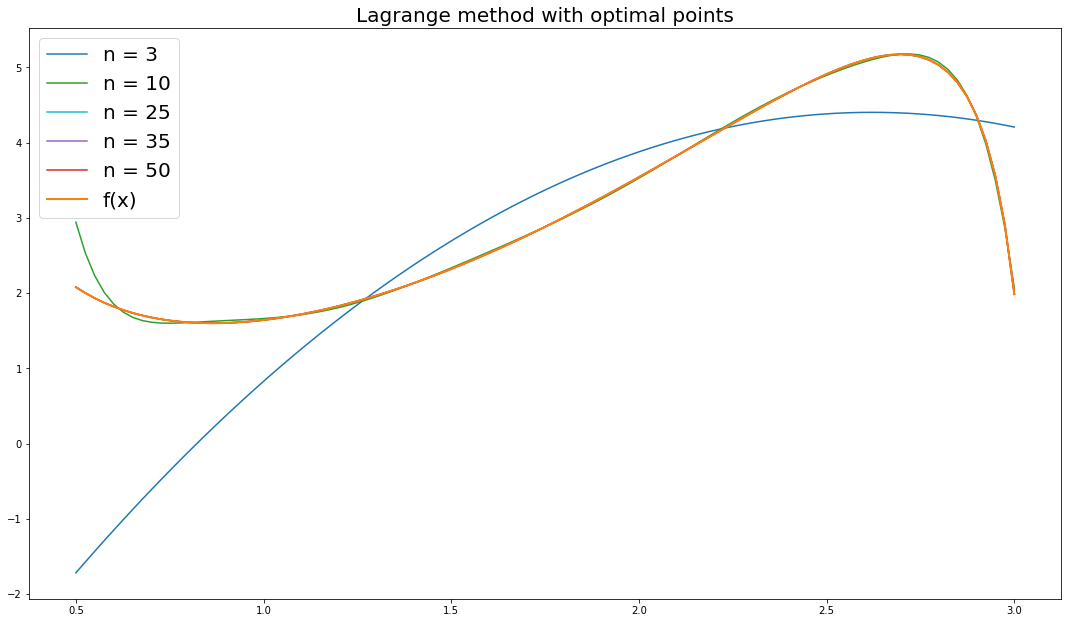

In [ ]:
a = 0.5
b = 3


    
x = np.linspace(a, b, 100)
y = np.array([f(y) for y in x])
y_3 = np.array([lagrange(3, a, b, x, True) for x in x])
y_10 = np.array([lagrange(10, a, b, x, True) for x in x])
y_25 = np.array([lagrange(25, a, b, x, True) for x in x])
y_35 = np.array([lagrange(35, a, b, x, True) for x in x])
y_50 = np.array([lagrange(50, a, b, x, True) for x in x])


fig, ax = plt.subplots()
ax.set_title('Lagrange method with optimal points', fontsize = 20)
ax.plot(x, y_3, 'tab:blue', label = 'n = 3')
ax.plot(x, y_10, 'tab:green', label = 'n = 10')
ax.plot(x, y_25, 'tab:cyan', label = 'n = 25')
ax.plot(x, y_35, 'tab:purple', label = 'n = 35')
ax.plot(x, y_50, 'tab:red', label = 'n = 50')
ax.plot(x, y, 'tab:orange', label = 'f(x)', linewidth = 2)
ax.legend(prop = {'size': 20})
fig.set_size_inches(18.5, 10.5, forward=True)

In [ ]:
for n in range(1, 51):
    print(max_error(n, a, b))

n = 1, m = 100, RN_n = 3.09425962, RNopt_n = 3.53917249
n = 2, m = 200, RN_n = 1.69785211, RNopt_n = 1.52003331
n = 3, m = 300, RN_n = 3.43030491, RNopt_n = 3.79921006
n = 4, m = 400, RN_n = 2.11209632, RNopt_n = 2.51455557
n = 5, m = 500, RN_n = 2.53833897, RNopt_n = 2.9992784
n = 6, m = 600, RN_n = 1.81667124, RNopt_n = 2.16321091
n = 7, m = 700, RN_n = 1.80548222, RNopt_n = 1.98078025
n = 8, m = 800, RN_n = 1.38855166, RNopt_n = 1.45503458
n = 9, m = 900, RN_n = 1.26190017, RNopt_n = 1.17949679
n = 10, m = 1000, RN_n = 1.00513983, RNopt_n = 0.86221322
n = 11, m = 1100, RN_n = 0.87216622, RNopt_n = 0.65505925
n = 12, m = 1200, RN_n = 0.70627501, RNopt_n = 0.47283302
n = 13, m = 1300, RN_n = 0.59757617, RNopt_n = 0.34574077
n = 14, m = 1400, RN_n = 0.48739535, RNopt_n = 0.24607253
n = 15, m = 1500, RN_n = 0.40649458, RNopt_n = 0.17553393
n = 16, m = 1600, RN_n = 0.33238908, RNopt_n = 0.12330122
n = 17, m = 1700, RN_n = 0.27484387, RNopt_n = 0.08644768
n = 18, m = 1800, RN_n = 0.224811